In [96]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [81]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.5, 0.3, 7.5
param, p2 = get_outer_param_2(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = solve_out_2(Lx,Nx,ϕa,ϕp,v0,u)
f,u,c = load_out_2(Lx,Nx,ϕa,ϕp,v0)
err = check_F(u,p2)

8.481038094032556e-10

In [35]:
# Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.5, 0.3, 7.5
ϕa_sweep = 0.51:0.01:0.8;
param_sweep = [(100.0, 1024, ϕa, 0.3, 7.5) for ϕa in ϕa_sweep];
sweep = param_sweep[1]

(100.0, 1024, 0.51, 0.3, 7.5)

In [36]:
for sweep in param_sweep
    local Lx, Nx, ϕa, ϕp, v0
    global f,u,c
    Lx, Nx, ϕa, ϕp, v0 = sweep
    param, p2 = get_outer_param_2(sweep...)
    f,u,c = solve_out_2(Lx,Nx,ϕa,ϕp,v0,u)
    mag_av = sum(f[:,2]-f[:,1])/Nx
    err = err = check_F(u,p2)
    print("solved: Lx, Nx, ϕa, ϕp, v0 = $(sweep) | c=$(c), m_av =$(mag_av), err = $(err)")
end

solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.51, 0.3, 7.5) | c=0.015517639997388038, m_av =0.0016814360322705254, err = 1.1605152394622564e-9solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.52, 0.3, 7.5) | c=0.015602639592295589, m_av =0.0011932638398413767, err = 1.318767317570746e-11solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.53, 0.3, 7.5) | c=0.015197245546996118, m_av =-0.0001665645659224661, err = 1.5806163311538057e-7

DomainError: DomainError with -0.005734790710103521:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
DomainError detected in the user `f` function. This occurs when the domain of a function is violated.
For example, `log(-1.0)` is undefined because `log` of a real number is defined to only output real
numbers, but `log` of a negative number is complex valued and therefore Julia throws a DomainError
by default. Cases to be aware of include:

* `log(x)`, `sqrt(x)`, `cbrt(x)`, etc. where `x<0`
* `x^y` for `x<0` floating point `y` (example: `(-1.0)^(1/2) == im`)

Within the context of SciML, this error can occur within the solver process even if the domain constraint
would not be violated in the solution due to adaptivity. For example, an ODE solver or optimization
routine may check a step at `new_u` which violates the domain constraint, and if violated reject the
step and use a smaller `dt`. However, the throwing of this error will have halted the solving process.

Thus the recommended fix is to replace this function with the equivalent ones from NaNMath.jl
(https://github.com/JuliaMath/NaNMath.jl) which returns a NaN instead of an error. The solver will then
effectively use the NaN within the error control routines to reject the out of bounds step. Additionally,
one could perform a domain transformation on the variables so that such an issue does not occur in the
definition of `f`.

For more information, check out the following FAQ page:
https://docs.sciml.ai/Optimization/stable/API/FAQ/#The-Solver-Seems-to-Violate-Constraints-During-the-Optimization,-Causing-DomainErrors,-What-Can-I-Do-About-That?


In [86]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.52, 0.3, 7.5
param, p2 = get_outer_param_2(Lx,Nx,ϕa,ϕp,v0)
f,u,c = load_out_2(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = solve_out_2(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-9)
err, avmag = check_u(u,p2)

(1.318767317570746e-11, 0.11932638398413763)

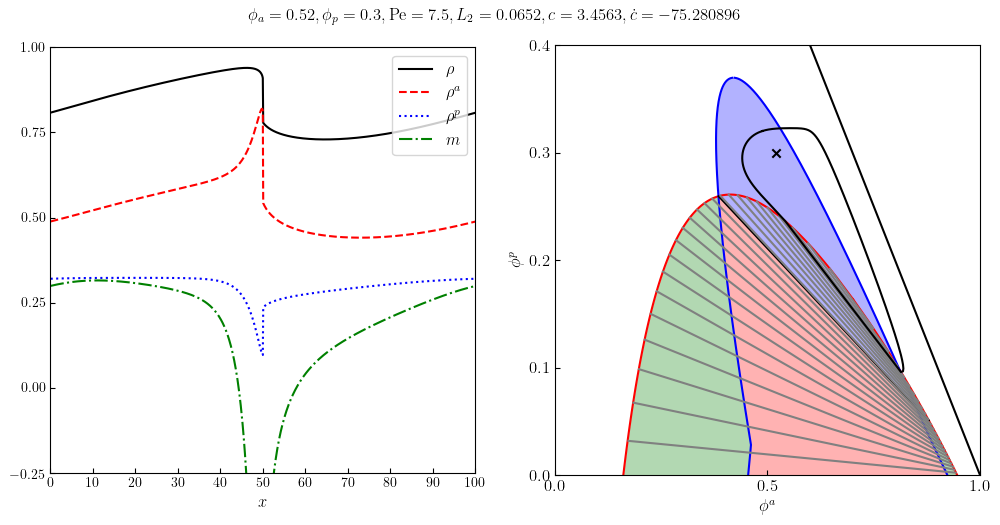

In [87]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f)

In [88]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.5, 0.3, 7.5
param, p2 = get_outer_param_2(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = solve_out_2(Lx,Nx,ϕa,ϕp,v0,u)
f,u,c = load_out_2(Lx,Nx,ϕa,ϕp,v0)
err, av_mag = check_u(u,p2)

(8.481038094032556e-10, 0.19095556385867332)

In [92]:
# Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.5, 0.3, 7.5
ϕa_sweep = 0.39:(-0.01):0.2;
param_sweep = [(100.0, 1024, ϕa, 0.3, 7.5) for ϕa in ϕa_sweep];
sweep = param_sweep[1]

(100.0, 1024, 0.39, 0.3, 7.5)

In [93]:
for sweep in param_sweep
    local Lx, Nx, ϕa, ϕp, v0
    global f,u,c
    Lx, Nx, ϕa, ϕp, v0 = sweep
    param, p2 = get_outer_param_2(sweep...)
    f,u,c = solve_out_2(Lx,Nx,ϕa,ϕp,v0,u)
    mag_av = sum(f[:,2]-f[:,1])/Nx
    err = check_F(u,p2)
    print("solved: Lx, Nx, ϕa, ϕp, v0 = $(sweep) | c=$(c), m_av =$(mag_av), err = $(err) ")
end

solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.39, 0.3, 7.5) | c=0.017223944307120848, m_av =0.002575150807099564, err = 1.5275269937831126e-10 solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.38, 0.3, 7.5) | c=0.017860936987430798, m_av =0.002596493268388377, err = 1.7943535546294243e-10 solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.37, 0.3, 7.5) | c=0.018608503687424036, m_av =0.0026139671819788127, err = 2.2091750651043185e-10 solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.36, 0.3, 7.5) | c=0.019484557603115613, m_av =0.002627371725592706, err = 2.892637240847762e-10 solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.35, 0.3, 7.5) | c=0.020513114774363746, m_av =0.002636341247884209, err = 4.1033398900935936e-10 solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.34, 0.3, 7.5) | c=0.021727288749252057, m_av =0.00264028790490834, err = 6.488398707205079e-10 solved: Lx, Nx, ϕa, ϕp, v0 = (100.0, 1024, 0.33, 0.3, 7.5) | c=0.023174670674343322, m_av =0.002638284820904245, err = 1.1814700329182415e-9 solved: L

DomainError: DomainError with NaN:
integrand produced NaN in the interval (0.0, NaN)

In [95]:
collect(0.29:0.01:0.53)

25-element Vector{Float64}:
 0.29
 0.3
 0.31
 0.32
 0.33
 0.34
 0.35
 0.36
 0.37
 0.38
 ⋮
 0.45
 0.46
 0.47
 0.48
 0.49
 0.5
 0.51
 0.52
 0.53